# Multilayer Perceptron 
#### Niloufar Babaahmadi 610398103 hw6

In [ ]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import os

matrix multiplation

In [ ]:
def matmul(a,q):
    
    x = a.tolist()
    y = q.tolist()
    
    qw = np.matrix(x)
    qe = np.matrix(y)
    
    mul = qw*qe
    l = mul.tolist()
    
    return np.array(l)

Implementation of neural network

In [ ]:
class NeuralNetwork:

    def __init__(self,numi,numh,numo):#numi- no of input layers 
                                        # numh=no of hidden neurons
                                      # numo-no of outputs layer
          self.input_nodes = numi
          self.hidden_nodes = numh
          self.output_nodes = numo
        
          self.weights_ih = np.empty([self.hidden_nodes,self.input_nodes])
          self.weights_ho = np.empty([self.output_nodes,self.hidden_nodes])
        
          self.bias_h = np.empty([self.hidden_nodes])
          self.bias_o = np.empty([self.output_nodes])
        
          self.lr = 0.0997
            
          for i in range(self.hidden_nodes):
            
              self.bias_h[i] = np.random.randn()
                
              for j in range(self.input_nodes):
                
                  self.weights_ih[i][j] = np.random.randn()
                    
          for i in range(self.output_nodes):
            
              self.bias_o[i] = np.random.randn()
                
              for j in range(self.hidden_nodes):
                
                  self.weights_ho[i][j] = np.random.randn()

 sigmoid and derivative

In [ ]:
class NeuralNetwork(NeuralNetwork):
    
        def sigmoid(self,x):
            
            return 1/(1+np.exp(-x))

        def sigmoidp(self,x):
            
            return sigmoid(x)*(1-sigmoid(x))

Given a predefined neural network architecture the process of generating an output from an input is called a forward pass. In this MLP the forward pass is represented as a series of matrix multiplications.

In [ ]:
class NeuralNetwork(NeuralNetwork):
    
        def feedforward(self,inputq=[]):
    
            inputs = np.array(inputq,np.dtype('float64'))
            h = np.add(np.dot(self.weights_ih,inputs),self.bias_h)
            hidden = np.empty([len(h)])

            for i in range(len(h)):

                hidden[i] = self.sigmoid(h[i])

            output = np.add(np.dot(self.weights_ho,hidden),self.bias_o)
            guess = np.empty(len(output))

            for i in range(len(output)):

                guess[i] = self.sigmoid(output[i])  

            return guess.tolist()

The train function

In [ ]:
class NeuralNetwork(NeuralNetwork):
    
       def train(self,inputq=[],answers=[]):
            
            targets = np.array(answers,np.dtype('float64'))
            inputs = np.array(inputq,np.dtype('float64'))
            
            h = np.add(np.dot(self.weights_ih,inputs),self.bias_h)
            
            hidden = np.empty([len(h)])
            
            for i in range(len(h)):
                
                hidden[i] = self.sigmoid(h[i])
                
            output = np.add(np.dot(self.weights_ho,hidden),self.bias_o)
            outputs = np.empty(len(output))
            
            for i in range(len(output)):
                
                outputs[i] = self.sigmoid(output[i])
                
            output_error = np.subtract(targets,outputs)
            
            who_t = self.weights_ho.T
            hidden_error = np.dot(who_t,output_error)
            
            VWho = np.empty([self.output_nodes])
            VWih = np.empty([self.hidden_nodes])
            
            for i in range(self.output_nodes):
                
                    VWho[i] = self.lr*output_error[i]*(outputs[i]*(1-outputs[i]))
                    
            for i in range(self.hidden_nodes):
                
                    VWih[i] = self.lr*hidden_error[i]*(hidden[i]*(1-hidden[i]))
                    
            tin = np.empty([self.input_nodes,1])
            th = np.empty([self.hidden_nodes,1])
            
            for i in range(self.input_nodes):
                
                for j in range(1):
                    
                    tin[i][j] = inputs[i]
                    
            for i in range(self.hidden_nodes):
                
                for j in range(1):
                    
                    th[i][j] = hidden[i]
                    
            VWho_f = matmul(th,VWho)
            VWih_f = matmul(tin,VWih)
            
            self.weights_ih = np.add(self.weights_ih,VWih_f.T)
            self.weights_ho = np.add(self.weights_ho,VWho_f.T)
            
            self.bias_o = np.add(self.bias_o,VWho)
            self.bias_h = np.add(self.bias_h,VWih)

read inputs

In [ ]:
def reader(path):
    
    file = open(path)
    inp = file.read()
    file.close()

    inp_mat = inp.split('\n')
    
    return inp_mat

Finally; put together all these function in this main part and calculate the desired result.

In [ ]:
if __name__=="__main__" :
    
    nn = NeuralNetwork(2,4,1)
    
    inp_mat = reader("train")
    n = len(inp_mat)-1
    
    it = []
    t = []
    
    for i in range(n):
        
        helper = []
        
        x = inp_mat[i].split()
        
        helper.append(float(x[0]))
        helper.append(float(x[1]))
        
        it.append(helper)
        
        t.append([int(x[2])])
        
    it = np.array(it)
    t = np.array(t)

    for i in range(4000): 
        
        nn.train(it[i],t[i])

        
    inp_mat = reader("test") 
    m = len(inp_mat)-1
    
    input = []
    t = []
    
    for i in range(m):
        
        helper = []
        
        x = inp_mat[i].split()
        
        helper.append(float(x[0]))
        helper.append(float(x[1]))
        
        input.append(helper)
        
        t.append([int(x[2])])

    input = np.array(input)
    t = np.array(t)

    output = []
    bad = []
    
    #for plot
    
    x_0 = []
    y_0 = []
    
    x_1 = []
    y_1 = []

    for i in range(1000):
        
        output.append(nn.feedforward(input[i]))

    for i in range(len(output)):
    
        if output[i][0] > 0.5:
            
            output[i][0] = 1
            
        else:
            
            output[i][0] = 0
            
    check = 0
    
    for i in range(len(output)):
        
        if output[i][0] != t[i]:
            
            bad.append(input[i])
            check += 1
            
        #for plot
            
        if output[i][0] == 0:
            
            x_0.append(input[i][0])
            y_0.append(input[i][1])
            
#             print(input[i][0], end = ' ')
#             print(input[i][1], end = '\n')
#             print("------")
            
        if output[i][0] == 1:
            
            x_1.append(input[i][0])
            y_1.append(input[i][1])
            
    v = 1000 - check
    
    print(v/1000)
    print("---------------------------------------------------------")
    print(bad)

0.926
---------------------------------------------------------
[array([-0.63368781,  0.46984654]), array([ 0.02052918, -0.74106431]), array([0.23047427, 1.3218883 ]), array([ 0.20850235, -1.50069896]), array([0.50492571, 1.33289141]), array([-0.02590112, -0.63746317]), array([-0.77283908,  2.54892115]), array([ 0.04378809, -0.24505804]), array([-0.18255429, -0.59171687]), array([-0.29985468,  0.08154997]), array([-0.7483894 , -0.51972681]), array([-0.180833  , -1.37166912]), array([ 1.00480338, -2.24461118]), array([-0.76343975,  2.84022344]), array([-0.28756905,  0.10411097]), array([ 0.22535723, -1.73359793]), array([-0.84259294, -1.40771658]), array([ 0.08152712, -0.35285817]), array([-0.2675737 , -1.60862594]), array([ 0.52330092, -1.22786949]), array([ 0.40379943, -1.22460592]), array([ 0.25298155, -1.17197596]), array([ 0.02890577, -0.72352707]), array([ 0.95927101, -2.68560886]), array([ 0.08762527, -1.1504663 ]), array([ 0.33942015, -1.93150785]), array([ 0.24488748, -1.534401

The assigned plot

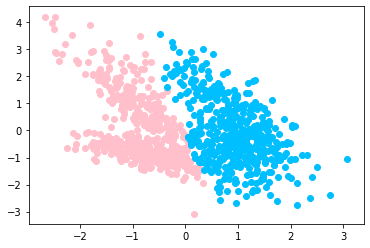

In [ ]:
plt.scatter(x_0, y_0, color = 'pink')
plt.scatter(x_1, y_1, color = 'deepskyblue')
plt.show()